<a href="https://colab.research.google.com/github/hsiang086/mnist/blob/main/test_the_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(
    optimizer='rmsprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
(train_images, train_lab), (test_images, test_lab) = \
    tf.keras.datasets.mnist.load_data()

In [19]:
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))

In [20]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

In [21]:
model.fit(train_images, train_lab, epochs=5, batch_size=128)
model.summary()

Epoch 1/5
469/469 [==============================] - 7s 13ms/step - loss: 0.2626 - accuracy: 0.9243
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1075 - accuracy: 0.9685
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0710 - accuracy: 0.9791
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0512 - accuracy: 0.9845
Epoch 5/5
469/469 [==============================] - 4s 10ms/step - loss: 0.0385 - accuracy: 0.9886
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
__________

In [22]:
model.save("mnist.keras")

In [23]:
path = "image.png"
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

In [24]:

if image is not None:
    # Convert the image to a NumPy array
    img = np.array(image)
    for i in range(280):
      for j in range(280):
          img[i][j] = 255. - img[i][j]
    # Print the shape of the NumPy array
    print("Shape of the NumPy array:", img.shape)
    print("array:", img)
else:
    print("Failed to load the image.")

Shape of the NumPy array: (280, 280)
array: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
img = cv2.resize(img, (28, 28))
img = cv2.GaussianBlur(img, (3, 3), 0)

191 0
1/1 [==============================] - 0s 50ms/step
9


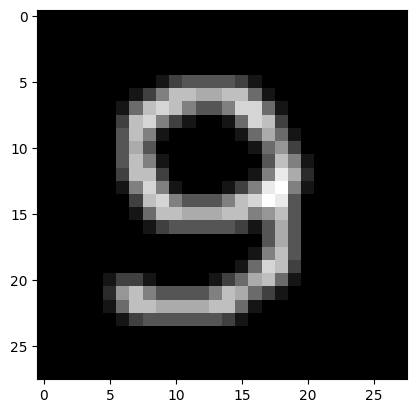

In [26]:
print(np.max(img), img.min())

model = tf.keras.models.load_model('mnist.keras')
print(np.argmax(model.predict(np.reshape(img, (1, 28*28)).astype('float32') / 255)[0]))

plt.imshow(img, cmap = 'gray')
plt.show()